<a href="https://colab.research.google.com/github/Machine-Learning-for-Finance/Machine-Learning-Algorithms/blob/master/01-Data%20Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating our First Models

This notebook will detail creating our first machine learning models we will show how to create the models using Sci-Kit Learn and TensorFlow.  The models we will show are:
- Decision Tree
- Random Forest
- Support Vector Machine
- Neural Network (Fully Connected)

In [15]:
import pandas as pd
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from os import environ

environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"

# Loading From Google Drive

In [4]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base_location = "/content/drive/My Drive/data/"
except:
    base_location = "/data/FannieMae/"

In [5]:
!ls /content/drive/My\ Drive/data/2010Q1

ls: cannot access '/content/drive/My Drive/data/2010Q1': No such file or directory


# Financial Datasets

There are a large number of financial datasets that are available, the first one we will discuss is the Fannie Mae Fixed Rate Mortgage Dataset.

- https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html

- https://loanperformancedata.fanniemae.com/lppub/index.html#Portfolio

Which consists of both Acquisitions and Performance data for a collection of mortgages.

To make our lives a bit easier here are the column names pulled from the provided `R` script to load the data.  See `R` is good for at least one thing.

In [6]:
AcquisitionColumnNames = (
    "LOAN_ID", "ORIG_CHN", "Seller.Name", 
    "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", 
    "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", 
    "PROP_TYP", "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", 
    "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", 
    "RELOCATION_FLG"
)

PerformanceColumnNames = (
    "LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", 
    "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
    "Adj.Month.To.Mat", "Maturity.Date", "MSA", 
    "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
    "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", 
    "FCC_COST", "PP_COST", "AR_COST", "IE_COST", 
    "TAX_COST", "NS_PROCS","CE_PROCS", "RMW_PROCS", 
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", 
    "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
)

In [7]:
# Data path will change depending on your system setup.

acquisition_data_path = f"{base_location}2010Q1/Acquisition_2010Q1.txt"

#### Loading the Acquisition Data from CSV

To load the data we call from `pandas`, `pd.read_csv` which automatically handles loading data from the csv file.  We provide column names, a notification that the file doesn't include headers, and information on what the column separator is `|` in this case.

In [8]:
acquisition_df = pd.read_csv(
    acquisition_data_path,
    names=AcquisitionColumnNames,
    header=None,
    sep="|"
)

In [9]:
acquisition_df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG'],
      dtype='object')

#### Loading the Performance Data

In [10]:
performance_data_path = f"{base_location}2010Q1/Performance_2010Q1.txt"

performance_df = pd.read_csv(
    performance_data_path,
    names=PerformanceColumnNames,
    header=None,
    sep="|"
)


/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


First thing we note is that this takes longer than the `Acquisitions` data to load, stemming from the fact that for each loan there are multiple monthly data elements loaded.

# Data Modifying

In [11]:
DS = set(performance_df['Delq.Status'])

In [12]:
print(DS)
mapper = {}
for ds in DS:
    try:
        mapper[ds] = int(ds)
    except:
        mapper[ds] = -1

performance_df['Delq.Status'] = performance_df['Delq.Status'].map(mapper)

{nan, '73', '26', '53', '60', '6', '82', '99', '46', '76', '14', '13', '65', '84', '57', '83', '62', '56', '51', '97', '11', '35', '7', '22', '38', '55', '19', '21', '36', '72', 'X', '33', '61', '28', '47', '44', '31', '88', '67', '90', '94', '23', '96', '68', '9', '74', '93', '30', '34', '25', '8', '2', '63', '27', '43', '75', '39', '37', '52', '78', '42', '16', '69', '5', '66', '18', '91', '15', '58', '92', '81', '4', '48', '98', '64', '70', '20', '59', '89', '71', '77', '87', '45', '54', '24', '32', '40', '95', '85', '10', '86', '17', '29', '12', '49', '1', '41', '50', '0', '79', '80', '3'}


In [13]:
V, C = np.unique(performance_df['Delq.Status'], return_counts=True)
print(V)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97 98 99]


# Grouping By Loan ID

https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby

In [17]:
loans = performance_df.groupby("LOAN_ID", sort=True)['Delq.Status'].max()

ID_To_Delinq = {}

for row in loans.iteritems():
    loan_id, delinq = row
    ID_To_Delinq[loan_id] = delinq

In [18]:
def mapper(row):
    return ID_To_Delinq.get(row["LOAN_ID"], -1)

acquisition_df['MAX_DELINQ'] = acquisition_df.apply(mapper, axis=1)

In [19]:
V, C = np.unique(acquisition_df['MAX_DELINQ'], return_counts=True)

# Data Loading For Model

We first need to clean the data and separate into training and testing datasets.

In [54]:
DEL_NOTNAN = acquisition_df["MAX_DELINQ"].notna()
df = acquisition_df[DEL_NOTNAN]
OLTV = df['OLTV'].notna()
df = df[OLTV]
CS = df['CSCORE_B'].notna()
df = df[CS]

credit_score  = np.array(df['CSCORE_B'])
loan_to_value = np.array(df['OLTV'])
max_delinq    = np.array(df['MAX_DELINQ'])

X = np.array([credit_score, loan_to_value]).transpose()
y = np.array([max_delinq]).transpose()
print(X.shape)
print(y.shape)

Total = np.hstack([X, y])
print(Total.shape)
np.random.shuffle(Total)

X = Total[:, :2]
y = Total[:, 2:]

print(X.shape)
print(y.shape)

prop = 0.8
train_num = int(prop * len(Total))
print(f"Train Number: {train_num}")

X_train, X_test = X[:train_num], X[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

print(f"X_Train: {X_train.shape}")
print(f"X_Test: {X_test.shape}")
print("=="*10)
print(f"y_Train: {y_train.shape}")
print(f"y_Test:  {y_test.shape}")

class_names = np.unique(y)

(322872, 2)
(322872, 1)
(322872, 3)
(322872, 2)
(322872, 1)
Train Number: 258297
X_Train: (258297, 2)
X_Test: (64575, 2)
y_Train: (258297, 1)
y_Test:  (64575, 1)


## Decision Tree

- https://towardsdatascience.com/what-is-a-decision-tree-22975f00f3e1

- https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

In [29]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.908246225319396


### Testing Parameters of Decision Tree Classifier


In [50]:
dtc = tree.DecisionTreeClassifier(
    max_depth=3,
    class_weight=None
)
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

0.9121951219512195


# Visualizing the Decision Tree

- https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

- https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

In [ ]:
from sklearn.externals.six import StringIO
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

[Text(167.4, 190.26, 'X[0] <= 722.5\ngini = 0.168\nsamples = 258297\nvalue = [3, 234959, 16488, 1889, 773, 544, 552, 435, 367, 297\n228, 210, 167, 138, 133, 123, 122, 83, 86, 55, 61\n50, 52, 41, 44, 27, 35, 25, 29, 29, 14, 22, 16\n19, 15, 13, 15, 12, 6, 5, 9, 6, 11, 7, 6, 3\n3, 4, 6, 9, 4, 5, 5, 2, 1, 3, 3, 2, 1, 1\n3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1]'),
 Text(83.7, 135.9, 'X[0] <= 670.5\ngini = 0.361\nsamples = 47448\nvalue = [1, 37391, 6304, 1030, 413, 304, 306, 248, 218, 153\n112, 116, 99, 74, 77, 70, 69, 44, 37, 31, 32, 27\n24, 23, 23, 12, 24, 14, 19, 12, 4, 14, 10, 14\n8, 6, 9, 7, 3, 2, 8, 2, 8, 3, 2, 2, 0, 3\n2, 5, 2, 4, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2\n1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1\n1, 1]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 643.5\ngini = 0.525\nsamples = 9742\nvalue = [0, 6426, 1879, 394, 151, 121, 126, 99, 93, 44, 46\n43, 34, 27, 24, 17, 26, 16, 12, 8, 18, 11, 15\n8, 9, 7, 11, 5, 7, 3, 2, 6, 3, 7, 2, 3, 4\n2, 2, 2, 2, 1, 4, 2, 2, 2, 0, 1, 2, 2,

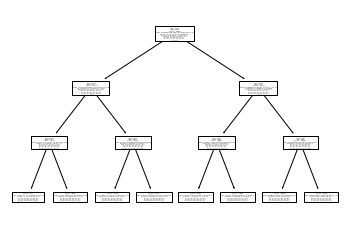

In [36]:
tree.plot_tree(dtc)

Creating Dot Data
Running Export Graphviz
Creating PyDotPlus Graph
Creating Image


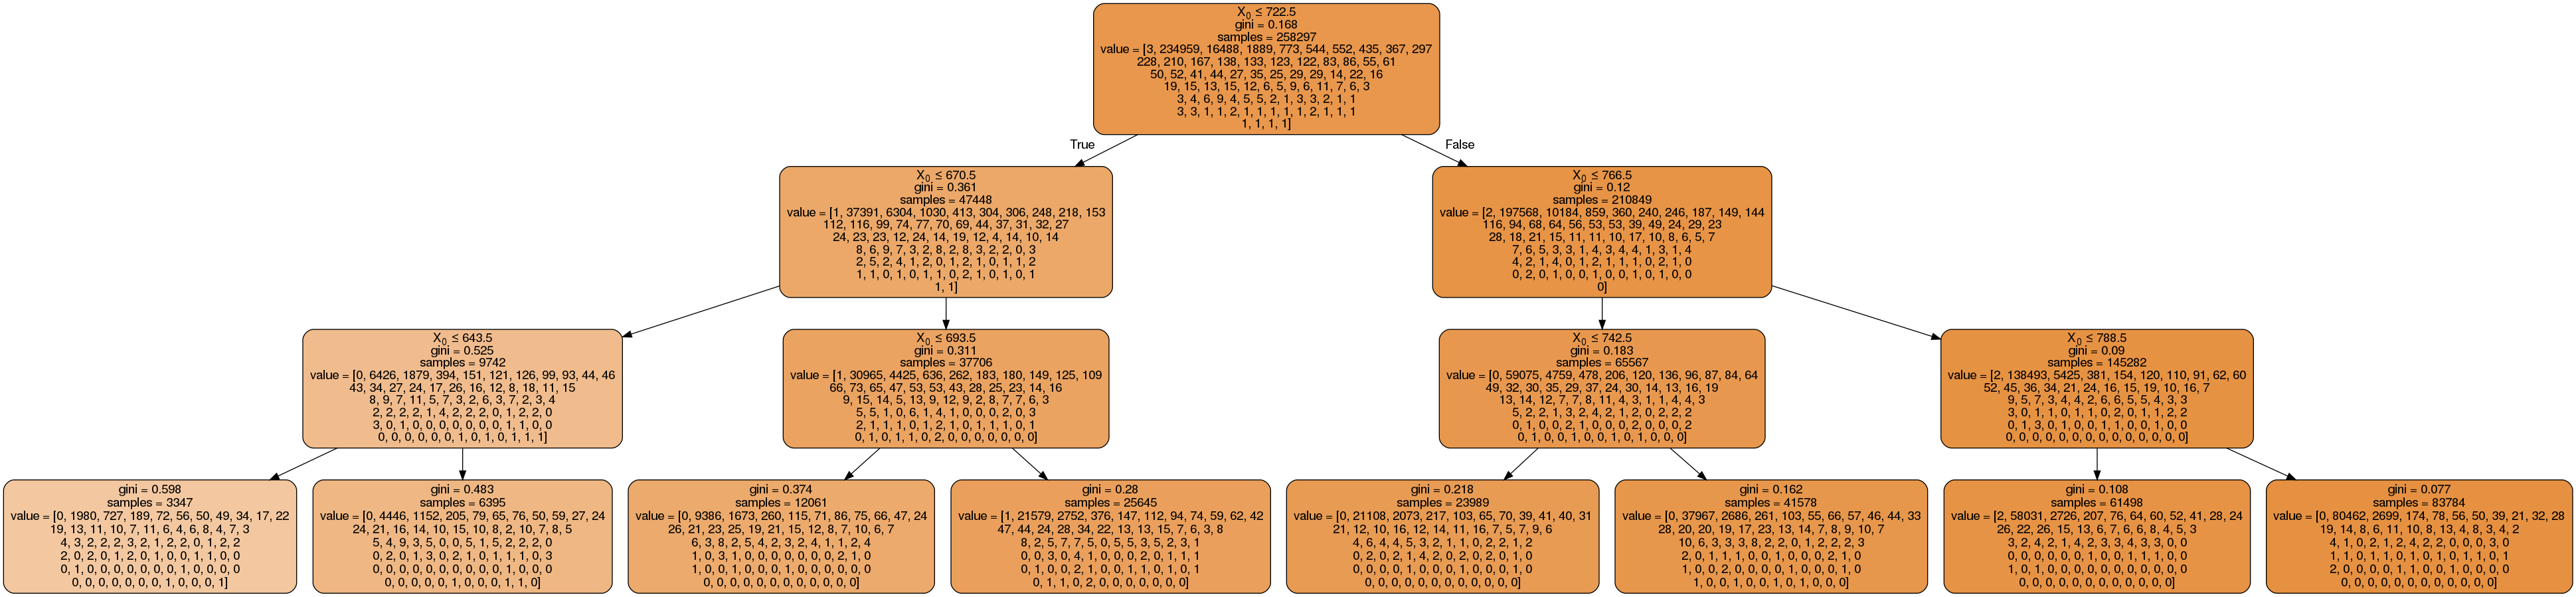

In [37]:
# This Cell can take a while to load.

print("Creating Dot Data")
dot_data = StringIO()


print("Running Export Graphviz")
export_graphviz(
    dtc, out_file=dot_data,  
    filled=True, rounded=True,
    special_characters=True
)

print("Creating PyDotPlus Graph")
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

print("Creating Image")
Image(graph.create_png())

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc = rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

/home/capcolabs/Stevens/Machine-Learning-Algorithms/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9041114982578398


### Feature Importance

One benefit of the Random Forest Classifier is you can get the relative importance for each of the features towards making the decision.

In [41]:
rfc.feature_importances_

array([0.73313046, 0.26686954])

# TensorFlow Model Example

In [42]:
# !pip install tensorflow-gpu
import tensorflow as tf

## Neural Network Architecture

Since we are dealing with just an input vector _Credit Score_ and _Original Loan to Value_ we will build our models with stacked dense layers. Our steps we take are 
1. Build the Dataset
2. Construct the Model
3. Compile the Model
4. Train the Model

In [46]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100
V = np.unique(y)

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset  = test_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

print(train_dataset)

<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float64, tf.float64)>


In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[2]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(V), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [57]:
history = model.fit(
    train_dataset, 
    validation_data=test_dataset, 
    epochs=10
)

Epoch 1/10
4036/4036 [==============================] - 12s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.8920 - val_loss: nan - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
4036/4036 [==============================] - 11s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 3/10
4036/4036 [==============================] - 10s 3ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 4/10
4036/4036 [==============================] - 10s 2ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 5/10
4036/4036 [==============================] - 10s 2ms/step - loss: nan - sparse_categorical_accuracy: 0.9105 - val_loss: nan - val_sparse_categorical_accuracy: 0.9089
Epoch 6/10
4036/4036 [==============================] - 10s 2ms/step - loss: nan - sparse_categorical_accuracy:

In [55]:
print(history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'sparse_categorical_accuracy': [0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513, 0.91047513], 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_sparse_categorical_accuracy': [0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811, 0.9088811]}


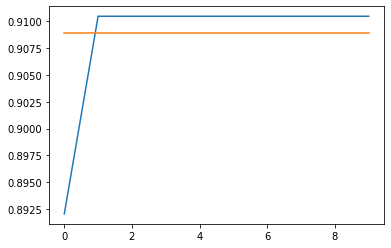

In [59]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.show()

# Data Exploration ( Testing Our Results )

Methods we will test:
- Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

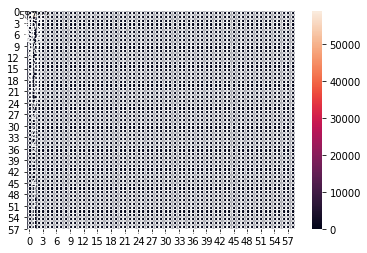

In [63]:
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

heatmap = sns.heatmap(cm, annot=True, fmt="d")

plt.show(heatmap)

In [66]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Heatmap(
        z=[[1, 20, 30],
          [20, 1, 60],
          [30, 60, 1]]))
fig.show()

In [67]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


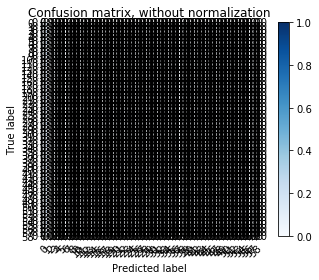

In [68]:
plot_confusion_matrix(
    y_test, y_pred, classes=class_names,
    normalize=True,
    title='Confusion matrix, without normalization')

# Creating New Label Data

In [81]:
DEL_NOTNAN = acquisition_df["MAX_DELINQ"].notna()
df = acquisition_df[DEL_NOTNAN]
OLTV = df['OLTV'].notna()
df = df[OLTV]
CS = df['CSCORE_B'].notna()
df = df[CS]

def mapper(row):
    delinq = row['MAX_DELINQ']
    if delinq > 12:
        return 2
    elif delinq > 0:
        return 1
    if delinq == -1:
        return -1
    else:
        return 0

df['Delinq.Bin'] = df.apply(mapper, axis=1)

credit_score  = np.array(df['CSCORE_B'])
loan_to_value = np.array(df['OLTV'])
max_delinq    = np.array(df['Delinq.Bin'])

X = np.array([credit_score, loan_to_value]).transpose()
y = np.array([max_delinq]).transpose()
print(X.shape)
print(y.shape)

Total = np.hstack([X, y])
print(Total.shape)
np.random.shuffle(Total)

X = Total[:, :2]
y = Total[:, 2:]


print(X.shape)
print(y.shape)

prop = 0.8
train_num = int(prop * len(Total))
print(f"Train Number: {train_num}")

X_train, X_test = X[:train_num], X[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

print(f"X_Train: {X_train.shape}")
print(f"X_Test: {X_test.shape}")
print("=="*10)
print(f"y_Train: {y_train.shape}")
print(f"y_Test:  {y_test.shape}")

class_names = np.unique(y)

(322872, 2)
(322872, 1)
(322872, 3)
(322872, 2)
(322872, 1)
Train Number: 258297
X_Train: (258297, 2)
X_Test: (64575, 2)
y_Train: (258297, 1)
y_Test:  (64575, 1)


(array([6.00000e+00, 0.00000e+00, 0.00000e+00, 2.93864e+05, 0.00000e+00,
        0.00000e+00, 2.74210e+04, 0.00000e+00, 0.00000e+00, 1.58100e+03]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

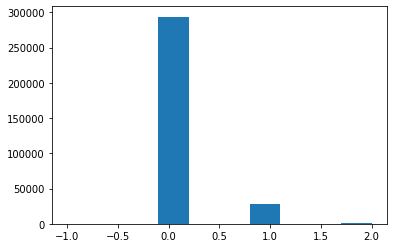

In [82]:
plt.hist(y)

## Creating Class Weighting

In [83]:
V, C = np.unique(y, return_counts=True)

class_weights = {}

for v, c in zip(V, C):
    prop = c / len(y)
    print(v, " | ", c)
    class_weights[v] = 1 - prop

-1.0  |  6
0.0  |  293864
1.0  |  27421
2.0  |  1581


In [84]:
dtc = tree.DecisionTreeClassifier(
    max_depth=None,
    class_weight=class_weights
)
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

0.6745644599303136


Normalized confusion matrix
[[0.         1.         0.         0.        ]
 [0.         0.6952214  0.30019918 0.00457942]
 [0.         0.49546115 0.49346405 0.0110748 ]
 [0.         0.41795666 0.56965944 0.0123839 ]]


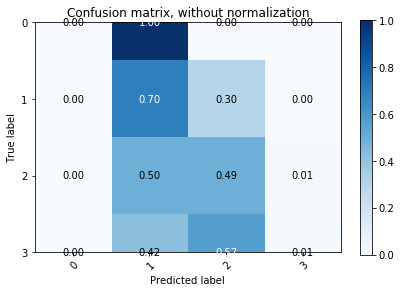

In [85]:
y_pred = dtc.predict(X_test)

plot_confusion_matrix(
    y_test, y_pred, classes=class_names,
    normalize=True,
    title='Confusion matrix, without normalization')